In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

try:
    df = pd.read_csv("loan.csv")
    print("file found and loaded")
except FileNotFoundError:
    print("File not found!")

File not found!


In [2]:
print(df.dtypes)

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


In [3]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
df.shape

(39717, 111)

In [6]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


# Remove the columns which contain NAs/NULLs 

In [8]:
print(df.isnull().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [10]:
# Check for columns with only null values
null_columns = df.columns[df.isna().all()]

print(null_columns)
print(len(null_columns))

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [11]:
df['mths_since_recent_bc_dlq']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
39712   NaN
39713   NaN
39714   NaN
39715   NaN
39716   NaN
Name: mths_since_recent_bc_dlq, Length: 39717, dtype: float64

#Remove columns which contain null values

## drop NA columns

In [14]:
df_cleaned = df.dropna(axis=1, how='all')

In [15]:
len(df_cleaned)

39717

In [16]:
df_cleaned.shape

(39717, 57)

In [17]:
df_cleaned.info

<bound method DataFrame.info of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... next_pymnt_d  \
0       36 months   10.65%       162.87     B     

In [18]:
df_cleaned.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

In [19]:
null_records = df_cleaned[df_cleaned.isnull().all(axis=1)]

# Univariate Analysis

## Univariate analysis for loan_status

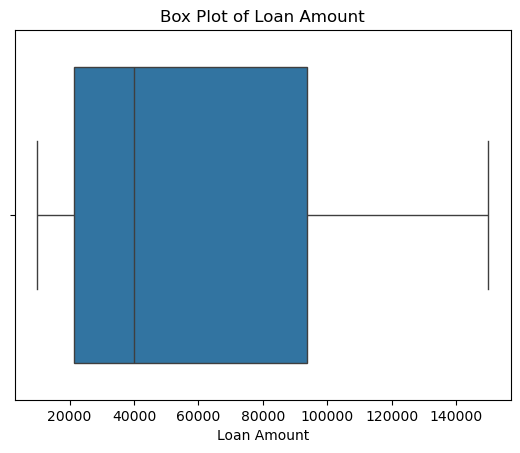

In [201]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create sample data
data = {'loan_amount': [10000, 15000, 20000, 25000, 30000, 50000, 75000, 100000, 120000, 150000]}
df = pd.DataFrame(data)

# Create a box plot
sns.boxplot(x='loan_amount', data=df)
plt.title('Box Plot of Loan Amount')
plt.xlabel('Loan Amount')
plt.show()

In [21]:
total_recs=len(df_cleaned)
loan_status_grouped =  df_cleaned['loan_status'].value_counts()
print(loan_status_grouped)
loan_status_percentage=(loan_status_grouped/total_recs)*100
print(loan_status_percentage)


loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64
loan_status
Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: count, dtype: float64


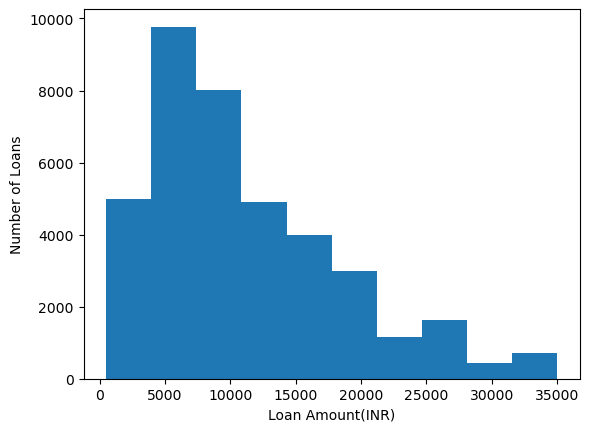

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [207]:
import matplotlib.pyplot as plt

# visualize the distribution of a numeric column
plt.hist(df_cleaned['loan_amnt'])
plt.xlabel('Loan Amount(INR)')
plt.ylabel('Number of Loans')
plt.show()

df_cleaned['loan_amnt'].describe()



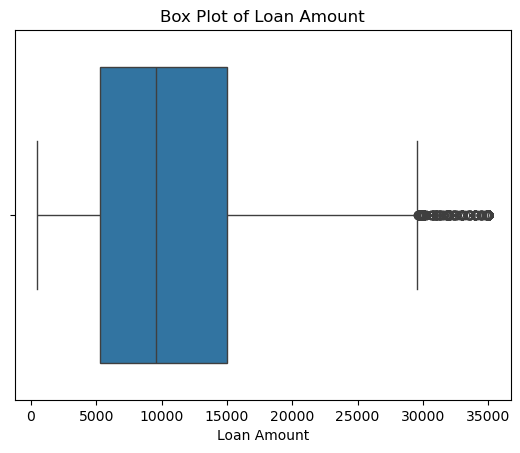

In [209]:
sns.boxplot(x='loan_amnt', data=df_cleaned)
plt.title('Box Plot of Loan Amount')
plt.xlabel('Loan Amount')
plt.show()

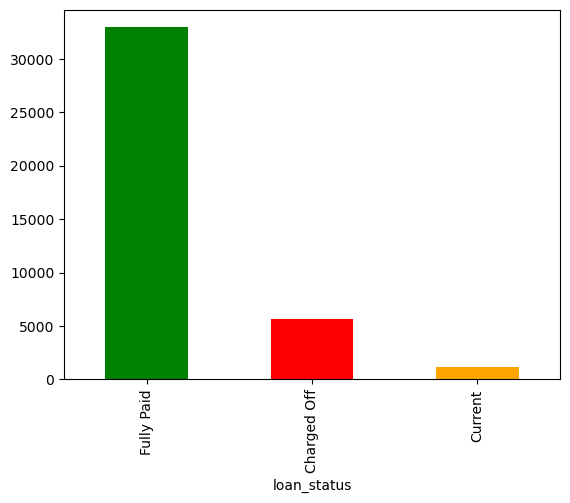

14.167736737417227

In [23]:
colors = ['green', 'red', 'orange']  # Adjust colors as desired
df['loan_status'].value_counts().plot(kind='bar',color=colors)
plt.show()

loan_status_counts=df['loan_status'].value_counts()
total_loans = loan_status_counts.sum()
default_rate = (loan_status_counts['Charged Off'] / total_loans) * 100
default_rate

# Remove columns which contain more than 60% null or NA values

In [25]:
#calculate number of null values 
null_count = df_cleaned.isnull().sum()
type(null_count)
null_percentage = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100
columns_with_high_nulls = null_percentage[null_percentage > 50]

#type(df_cleaned)
#null_count.to_csv("D:/data.csv", index=True)
#null_count.columns

#.sum()
#type(null_count)
print(columns_with_high_nulls)

mths_since_last_delinq    64.662487
mths_since_last_record    92.985372
next_pymnt_d              97.129693
dtype: float64


In [26]:
df['mths_since_last_record'].describe()

count    2786.000000
mean       69.698134
std        43.822529
min         0.000000
25%        22.000000
50%        90.000000
75%       104.000000
max       129.000000
Name: mths_since_last_record, dtype: float64

In [27]:
df_cleaned = df_cleaned.drop(['mths_since_last_delinq','mths_since_last_record','next_pymnt_d'], axis=1)


## Remove records where loan_status is current

In [29]:
df_cleaned = df_cleaned[df_cleaned['loan_status'] != 'Current']


In [30]:
df_cleaned.shape

(38577, 54)

In [31]:
df_cleaned.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.857700e+04,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,...,38577.000000,38577.000000,38577.000000,38521.0,38577.0,38577.0,38521.0,38577.0,37880.000000,38538.0
mean,6.763787e+05,8.422843e+05,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,0.146668,0.871737,...,98.035545,12.772728,2746.243218,0.0,1.0,0.0,0.0,0.0,0.043479,0.0
std,2.092639e+05,2.644519e+05,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,0.492271,1.071546,...,698.650182,150.836853,4494.648131,0.0,0.0,0.0,0.0,0.0,0.204583,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.120330e+05,6.611310e+05,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,...,0.000000,0.000000,217.420000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.564230e+05,8.392920e+05,9600.000000,9550.000000,8733.440000,277.860000,5.886800e+04,13.370000,0.000000,1.000000,...,0.000000,0.000000,568.260000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.291460e+05,1.037336e+06,15000.000000,15000.000000,14000.000000,425.550000,8.200000e+04,18.560000,0.000000,1.000000,...,0.000000,0.000000,3447.250000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [32]:
df_cleaned.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [33]:
df_cleaned.to_csv("D:/data.csv", index=False)


In [34]:
df_cleaned = df_cleaned.drop(['total_pymnt','out_prncp','out_prncp_inv','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'], axis=1)

In [35]:
df_cleaned.to_csv("D:/data1.csv", index=False)


In [36]:
df_cleaned['int_rate'].describe()
df_cleaned['int_rate']

0        10.65%
1        15.27%
2        15.96%
3        13.49%
5         7.90%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 38577, dtype: object

In [37]:
df_cleaned['int_rate'] = df_cleaned['int_rate'].str.replace('%', '')
df_cleaned['int_rate']=pd.to_numeric(df_cleaned['int_rate'])
df_cleaned['int_rate'] = df_cleaned['int_rate'].round(1)
df_cleaned['int_rate']

0        10.6
1        15.3
2        16.0
3        13.5
5         7.9
         ... 
39712     8.1
39713    10.3
39714     8.1
39715     7.4
39716    13.8
Name: int_rate, Length: 38577, dtype: float64

In [38]:
df_cleaned['int_rate'].describe()

count    38577.000000
mean        11.932385
std          3.692689
min          5.400000
25%          8.900000
50%         11.700000
75%         14.400000
max         24.400000
Name: int_rate, dtype: float64

(array([4583., 5252., 6539., 7099., 6715., 4208., 2597., 1053.,  450.,
          81.]),
 array([ 5.4,  7.3,  9.2, 11.1, 13. , 14.9, 16.8, 18.7, 20.6, 22.5, 24.4]),
 <BarContainer object of 10 artists>)

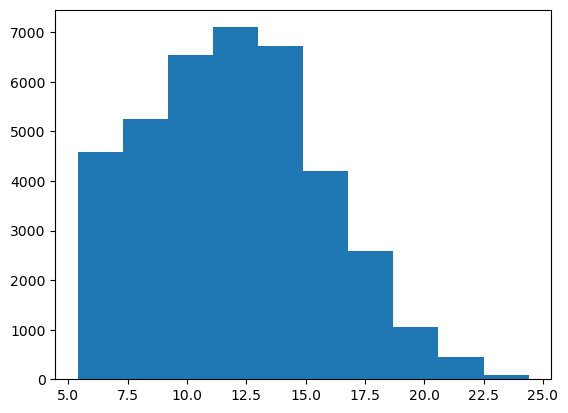

In [39]:
plt.hist(df_cleaned['int_rate'])

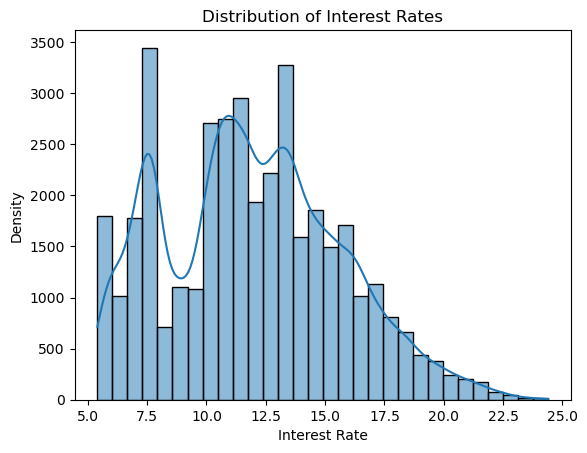

count    38577.000000
mean        11.932385
std          3.692689
min          5.400000
25%          8.900000
50%         11.700000
75%         14.400000
max         24.400000
Name: int_rate, dtype: float64

In [217]:
df_cleaned['int_rate_floor'] = df_cleaned['int_rate'].apply(np.floor)

sns.histplot(df_cleaned['int_rate'] , bins=30, kde=True)
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.show()

df_cleaned['int_rate'].describe()

In [41]:
df_cleaned['int_rate_floor'] 

0        10.0
1        15.0
2        16.0
3        13.0
5         7.0
         ... 
39712     8.0
39713    10.0
39714     8.0
39715     7.0
39716    13.0
Name: int_rate_floor, Length: 38577, dtype: float64

(array([3479., 6329., 5511., 8154., 6894., 4637., 2143., 1043.,  347.,
          40.]),
 array([ 5. ,  6.9,  8.8, 10.7, 12.6, 14.5, 16.4, 18.3, 20.2, 22.1, 24. ]),
 <BarContainer object of 10 artists>)

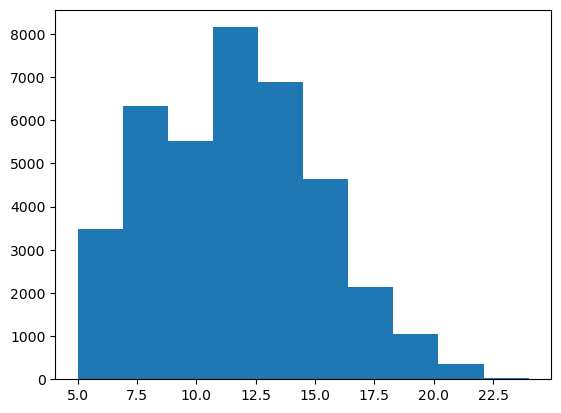

In [42]:
plt.hist(df_cleaned['int_rate_floor'])

# Create histogram of interest rate to check the most used lending rate.

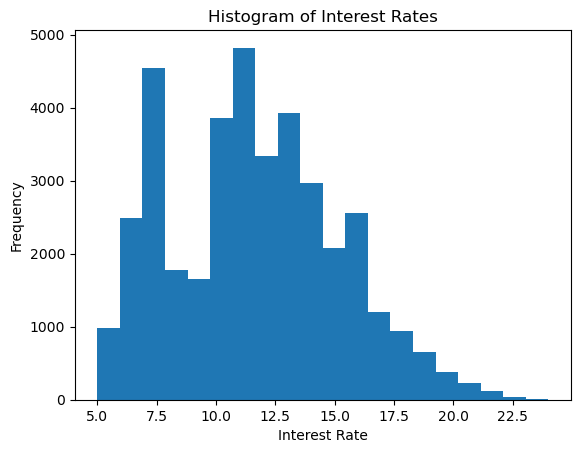

In [44]:
# Get the unique values in the int_rate column
unique_values = df_cleaned['int_rate_floor'].unique()

# Create a histogram with one bar for each unique value
plt.hist(df_cleaned['int_rate_floor'], bins=len(unique_values))

# Set labels and title
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Interest Rates')

# Show the plot
plt.show()

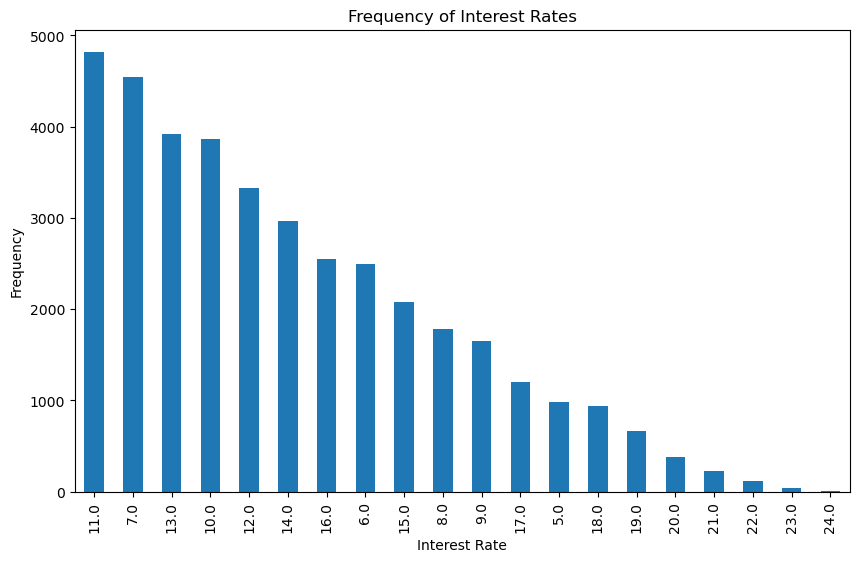

In [45]:
df1 = df_cleaned.sort_values('int_rate_floor')

interest_rate_counts = df1['int_rate_floor'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
interest_rate_counts.plot(kind='bar')

# Set labels and title
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.title('Frequency of Interest Rates')

# Show the plot
plt.show()

## Relation between interest rate and loan status

loan_status
Charged Off    13.821166
Fully Paid     11.609830
Name: int_rate, dtype: float64


<Figure size 800x500 with 0 Axes>

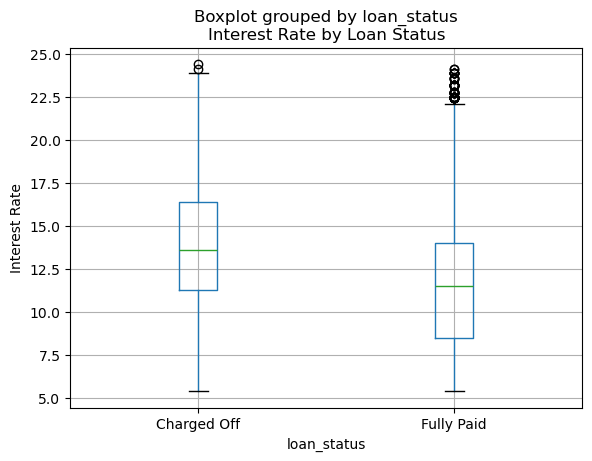

In [47]:

# Group by loan status and calculate average interest rate
grouped_data = df_cleaned.groupby('loan_status')['int_rate'].mean()

# Print the average interest rates
print(grouped_data)

# Create box plots
plt.figure(figsize=(8, 5))
df_cleaned.boxplot(by='loan_status', column=['int_rate'])
plt.title('Interest Rate by Loan Status')
plt.ylabel('Interest Rate')
plt.show()

## Loan amount vs interest rate 

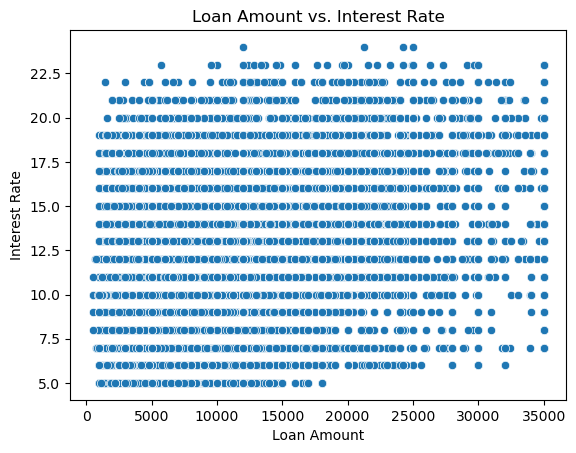

Correlation coefficient: 0.2980857005767569


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
sns.scatterplot(x='loan_amnt', y='int_rate_floor', data=df_cleaned)
plt.title('Loan Amount vs. Interest Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()

# Calculate correlation coefficient
correlation = df_cleaned['loan_amnt'].corr(df_cleaned['int_rate_floor'])
print('Correlation coefficient:', correlation)

In [231]:
df_cleaned['pub_rec']

0        0
1        0
2        0
3        0
5        0
        ..
39712    0
39713    0
39714    0
39715    0
39716    0
Name: pub_rec, Length: 38577, dtype: int64

## Number of derogatory public records vs Loan status

   pub_rec  loan_status  count_x  count_y         pct
0        0  Charged Off     5160    36507   14.134276
1        0   Fully Paid    31347    36507   85.865724
2        1  Charged Off      457     2013   22.702434
3        1   Fully Paid     1556     2013   77.297566
4        2  Charged Off       10       48   20.833333
5        2   Fully Paid       38       48   79.166667
6        3   Fully Paid        7        7  100.000000
7        4   Fully Paid        2        2  100.000000


<Axes: xlabel='pub_rec', ylabel='pct'>

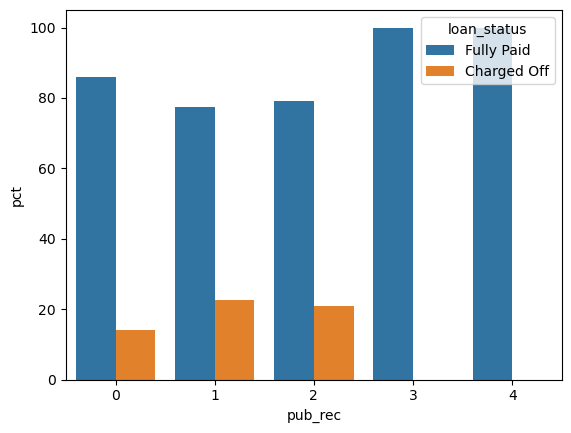

In [257]:
grouped_data = df_cleaned.groupby(['pub_rec', 'loan_status']).size().reset_index(name='count')
grouped_data_t1 = df_cleaned.groupby(['pub_rec']).size().reset_index(name='count')
merged_df = pd.merge(grouped_data, grouped_data_t1, on='pub_rec')
merged_df['pct']=(merged_df['count_x']/merged_df['count_y'])*100
print(merged_df)

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
sns.barplot(x='pub_rec', y='pct', hue='loan_status', data=merged_df, hue_order = ['Fully Paid', 'Charged Off'])

## Term vs Loan status

### create a derived column term_months

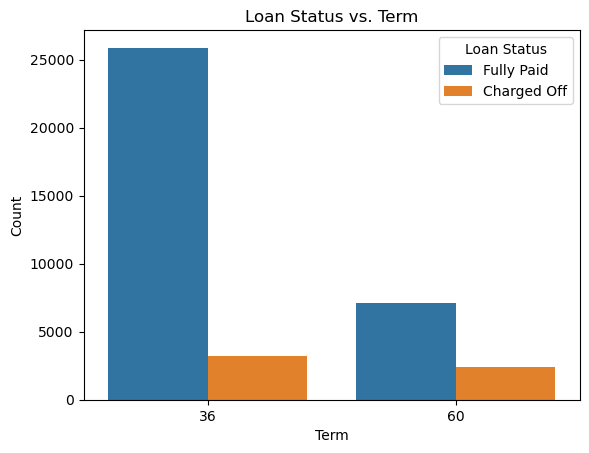

In [52]:
df_cleaned['term_months'] = df_cleaned['term'].str.extract(r'(\d+)').astype(int)
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
sns.countplot(x='term_months', hue='loan_status', data=df_cleaned)
plt.title('Loan Status vs. Term')
plt.xlabel('Term')
plt.ylabel('Count')
plt.legend(title='Loan Status')

In [53]:

# Assuming your DataFrame is named 'df'
grouped_data = df_cleaned.groupby(['term', 'loan_status']).size().reset_index(name='count')

print(grouped_data)

         term  loan_status  count
0   36 months  Charged Off   3227
1   36 months   Fully Paid  25869
2   60 months  Charged Off   2400
3   60 months   Fully Paid   7081


In [54]:
type(grouped_data)

pandas.core.frame.DataFrame

In [55]:
grouped_data_term = df_cleaned.groupby(['term']).size().reset_index(name='count')
grouped_data_term

,term,count
0,36 months,29096
1,60 months,9481


In [56]:
merged_df = pd.merge(grouped_data, grouped_data_term, on='term')
merged_df

,term,loan_status,count_x,count_y
0,36 months,Charged Off,3227,29096
1,36 months,Fully Paid,25869,29096
2,60 months,Charged Off,2400,9481
3,60 months,Fully Paid,7081,9481


In [57]:
merged_df['pct']=(merged_df['count_x']/merged_df['count_y'])*100

In [58]:
merged_df

,term,loan_status,count_x,count_y,pct
0,36 months,Charged Off,3227,29096,11.090872
1,36 months,Fully Paid,25869,29096,88.909128
2,60 months,Charged Off,2400,9481,25.313785
3,60 months,Fully Paid,7081,9481,74.686215


##  Annual income vs Loan Status

In [60]:
print(df_cleaned['annual_inc'].describe())


count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


### Based on the summary statistics, the annual_inc variable has a wide range (min: 4000, max: 6000000) and a significant standard deviation. This suggests that the data might be skewed or have outliers.

In [62]:
Q1 = df_cleaned['annual_inc'].quantile(0.25)
Q3 = df_cleaned['annual_inc'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_cleaned[(df_cleaned['annual_inc'] < lower_bound) | (df_cleaned['annual_inc'] > upper_bound)]

# Remove outliers
df_cleaned_annual_inc = df_cleaned[(df_cleaned['annual_inc'] >= lower_bound) & (df_cleaned['annual_inc'] <= upper_bound)]

In [63]:
df_cleaned_annual_inc['annual_inc'].describe()

count     36815.000000
mean      61218.193490
std       28224.583784
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
max      145000.000000
Name: annual_inc, dtype: float64

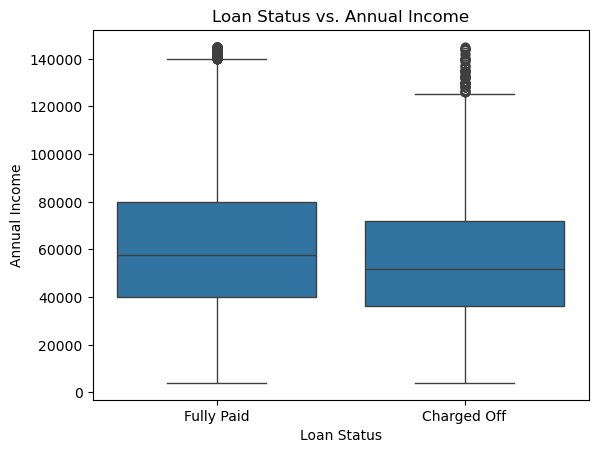

In [64]:
sns.boxplot(x='loan_status', y='annual_inc', data=df_cleaned_annual_inc)
plt.title('Loan Status vs. Annual Income')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.show()

## Home ownership vs Loan Status

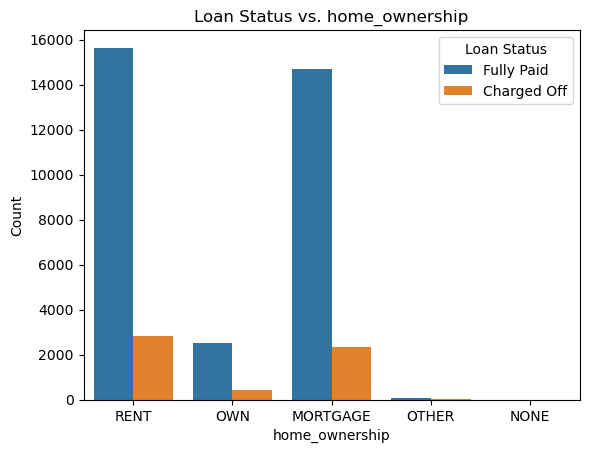

In [66]:
# Create a bar plot
default_rates = df_cleaned.groupby('home_ownership')['loan_status'].count()

sns.countplot(x='home_ownership', hue='loan_status', data=df_cleaned)
plt.title('Loan Status vs. home_ownership')
plt.xlabel('home_ownership')
plt.ylabel('Count')
plt.legend(title='Loan Status')

  home_ownership  loan_status  count_x  count_y         pct
0       MORTGAGE  Charged Off     2327    17021   13.671347
1       MORTGAGE   Fully Paid    14694    17021   86.328653
2           NONE   Fully Paid        3        3  100.000000
3          OTHER  Charged Off       18       98   18.367347
4          OTHER   Fully Paid       80       98   81.632653
5            OWN  Charged Off      443     2975   14.890756
6            OWN   Fully Paid     2532     2975   85.109244
7           RENT  Charged Off     2839    18480   15.362554
8           RENT   Fully Paid    15641    18480   84.637446


<Axes: xlabel='home_ownership', ylabel='pct'>

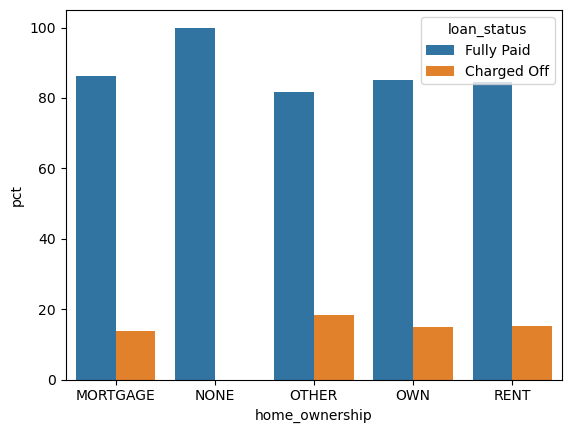

In [67]:
grouped_data = df_cleaned.groupby(['home_ownership', 'loan_status']).size().reset_index(name='count')
grouped_data_t1 = df_cleaned.groupby(['home_ownership']).size().reset_index(name='count')
merged_df = pd.merge(grouped_data, grouped_data_t1, on='home_ownership')
merged_df['pct']=(merged_df['count_x']/merged_df['count_y'])*100
print(merged_df)

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
sns.barplot(x='home_ownership', y='pct', hue='loan_status', data=merged_df, hue_order = ['Fully Paid', 'Charged Off'])




Observation: The default rate is lowest for mortgages, at 13.7%, while the highest default rate is seen in the "Other" home ownership category, reaching 18.4%.

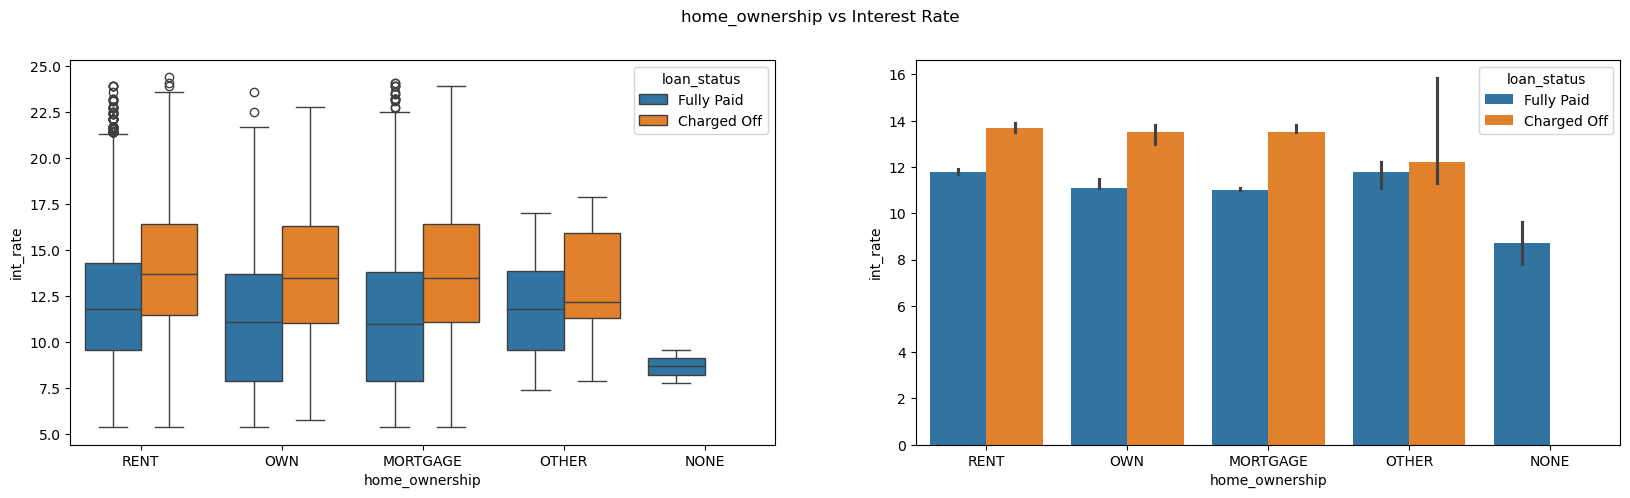

In [69]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='int_rate', hue='loan_status', data=df_cleaned)
plt.subplot(122)
sns.barplot(x='home_ownership', y='int_rate', hue='loan_status', data=df_cleaned, estimator=np.median)
plt.suptitle('home_ownership vs Interest Rate')
plt.show()

Whenever interest rate was high, irrespective of home ownership category, risk of default was high

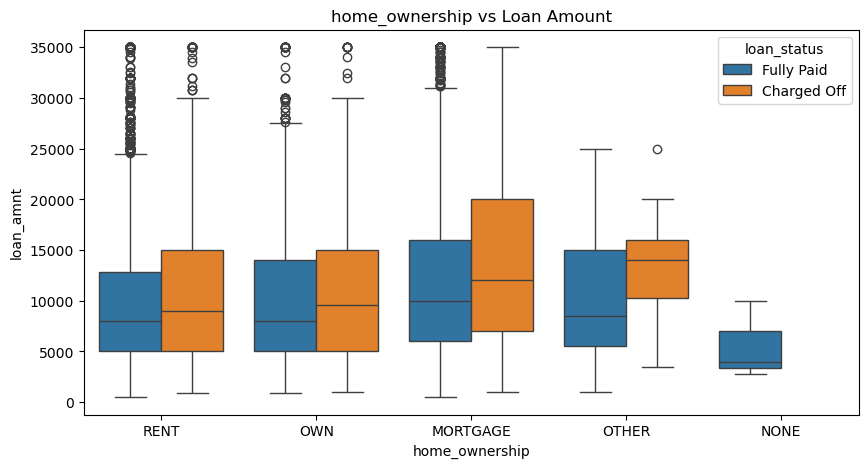

In [71]:
plt.figure(figsize=(10,5))
sns.boxplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=df_cleaned)
plt.title('home_ownership vs Loan Amount')

plt.show()

Customers with a home ownership status of MORTGAGE who borrowed larger amounts are at a higher risk of default.

## Employment length vs Loan Status

   emp_length  loan_status  count_x  count_y        pct
0      1 year  Charged Off      456     3169  14.389397
1      1 year   Fully Paid     2713     3169  85.610603
2   10+ years  Charged Off     1331     8488  15.680961
3   10+ years   Fully Paid     7157     8488  84.319039
4     2 years  Charged Off      567     4291  13.213703
5     2 years   Fully Paid     3724     4291  86.786297
6     3 years  Charged Off      555     4012  13.833500
7     3 years   Fully Paid     3457     4012  86.166500
8     4 years  Charged Off      462     3342  13.824057
9     4 years   Fully Paid     2880     3342  86.175943
10    5 years  Charged Off      458     3194  14.339386
11    5 years   Fully Paid     2736     3194  85.660614
12    6 years  Charged Off      307     2168  14.160517
13    6 years   Fully Paid     1861     2168  85.839483
14    7 years  Charged Off      263     1711  15.371128
15    7 years   Fully Paid     1448     1711  84.628872
16    8 years  Charged Off      203     1435  14

<Axes: xlabel='emp_length', ylabel='pct'>

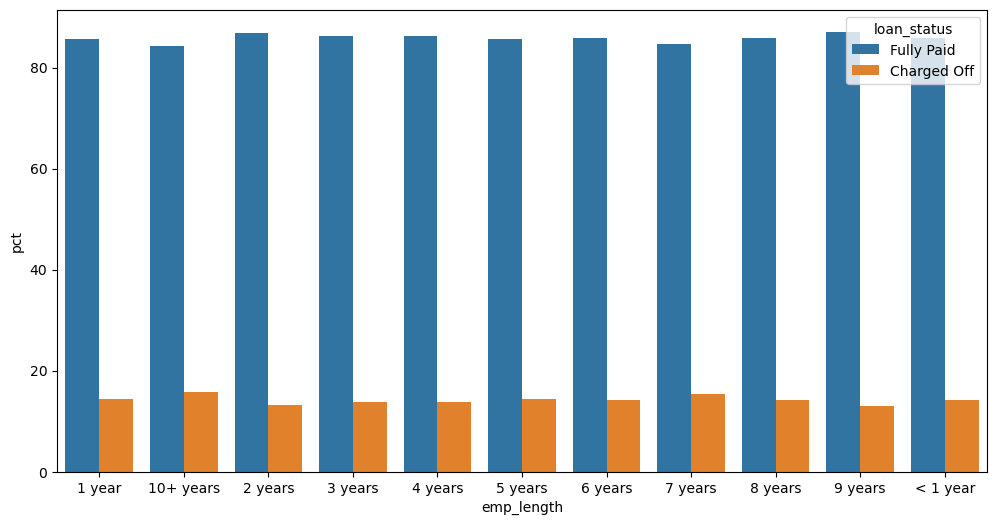

In [74]:
grouped_data = df_cleaned.groupby(['emp_length', 'loan_status']).size().reset_index(name='count')
grouped_data_t1 = df_cleaned.groupby(['emp_length']).size().reset_index(name='count')
merged_df = pd.merge(grouped_data, grouped_data_t1, on='emp_length')
merged_df['pct']=(merged_df['count_x']/merged_df['count_y'])*100
print(merged_df)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Assuming your DataFrame is named 'df'
sns.barplot(x='emp_length', y='pct', hue='loan_status', data=merged_df, hue_order = ['Fully Paid', 'Charged Off'])

there seems to be a weak relationship between employment length and the likelihood of loan default. While there are some variations in the default rates for different employment lengths, the overall trend is not very pronounced.

## Purpose vs Loan Status

               purpose  loan_status  count_x  count_y        pct
0                  car  Charged Off      160     1499  10.673783
1                  car   Fully Paid     1339     1499  89.326217
2          credit_card  Charged Off      542     5027  10.781778
3          credit_card   Fully Paid     4485     5027  89.218222
4   debt_consolidation  Charged Off     2767    18055  15.325395
5   debt_consolidation   Fully Paid    15288    18055  84.674605
6          educational  Charged Off       56      325  17.230769
7          educational   Fully Paid      269      325  82.769231
8     home_improvement  Charged Off      347     2875  12.069565
9     home_improvement   Fully Paid     2528     2875  87.930435
10               house  Charged Off       59      367  16.076294
11               house   Fully Paid      308      367  83.923706
12      major_purchase  Charged Off      222     2150  10.325581
13      major_purchase   Fully Paid     1928     2150  89.674419
14             medical  C

<Axes: xlabel='purpose', ylabel='pct'>

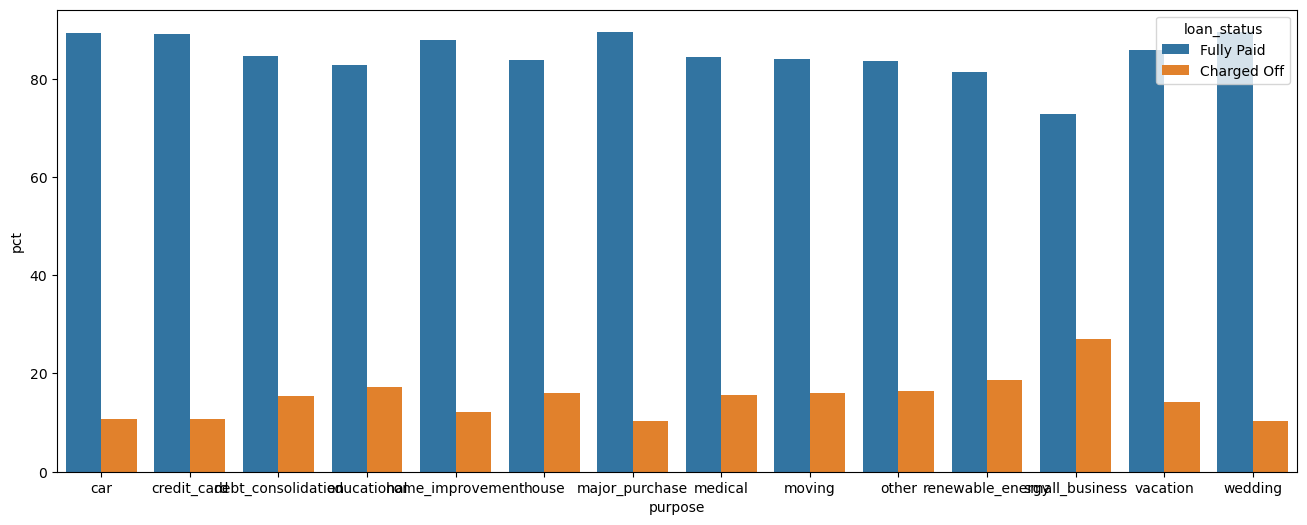

In [142]:
grouped_data = df_cleaned.groupby(['purpose', 'loan_status']).size().reset_index(name='count')
grouped_data_t1 = df_cleaned.groupby(['purpose']).size().reset_index(name='count')
merged_df = pd.merge(grouped_data, grouped_data_t1, on='purpose')
merged_df['pct']=(merged_df['count_x']/merged_df['count_y'])*100
print(merged_df)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))

# Assuming your DataFrame is named 'df'
sns.barplot(x='purpose', y='pct', hue='loan_status', data=merged_df, hue_order = ['Fully Paid', 'Charged Off'])

## DTI vs Loan Status

### create a new column dti_bucket and populate it based on the DTI values:

     dti_bucket  loan_status  count_x  count_y        pct
0       Low DTI  Charged Off     1631    12935  12.609200
1       Low DTI   Fully Paid    11304    12935  87.390800
2  Moderate DTI  Charged Off     2791    18441  15.134754
3  Moderate DTI   Fully Paid    15650    18441  84.865246
4      High DTI  Charged Off     1205     7201  16.733787
5      High DTI   Fully Paid     5996     7201  83.266213


C:\Users\PC\AppData\Local\Temp\ipykernel_16124\1830394852.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_cleaned.groupby(['dti_bucket', 'loan_status']).size().reset_index(name='count')
C:\Users\PC\AppData\Local\Temp\ipykernel_16124\1830394852.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data_t1 = df_cleaned.groupby(['dti_bucket']).size().reset_index(name='count')


<Axes: xlabel='dti_bucket', ylabel='pct'>

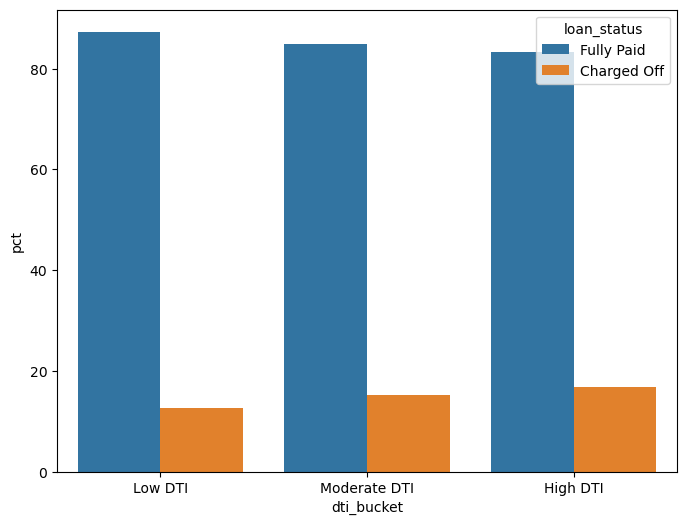

In [164]:
df_cleaned['dti_bucket'] = pd.cut(df_cleaned['dti'], bins=[-np.inf, 10, 20, np.inf], labels=['Low DTI', 'Moderate DTI', 'High DTI'])
df_cleaned['dti_bucket'] 

grouped_data = df_cleaned.groupby(['dti_bucket', 'loan_status']).size().reset_index(name='count')
grouped_data_t1 = df_cleaned.groupby(['dti_bucket']).size().reset_index(name='count')
merged_df = pd.merge(grouped_data, grouped_data_t1, on='dti_bucket')
merged_df['pct']=(merged_df['count_x']/merged_df['count_y'])*100
print(merged_df)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

# Assuming your DataFrame is named 'df'
sns.barplot(x='dti_bucket', y='pct', hue='loan_status', data=merged_df, hue_order = ['Fully Paid', 'Charged Off'])

Higher DTI is associated with a higher default rate: Borrowers in the "High DTI" category have a significantly higher default rate (16.73%) compared to those in the "Low DTI" (12.61%) and "Moderate DTI" (15.13%) categories.


State vs Loan Status

   addr_state  loan_status  count_x  count_y        pct
0          AK  Charged Off       15       78  19.230769
1          AK   Fully Paid       63       78  80.769231
2          AL  Charged Off       54      435  12.413793
3          AL   Fully Paid      381      435  87.586207
4          AR  Charged Off       27      235  11.489362
..        ...          ...      ...      ...        ...
92         WI   Fully Paid      377      440  85.681818
93         WV  Charged Off       21      172  12.209302
94         WV   Fully Paid      151      172  87.790698
95         WY  Charged Off        4       80   5.000000
96         WY   Fully Paid       76       80  95.000000

[97 rows x 5 columns]


<Axes: xlabel='addr_state', ylabel='pct'>

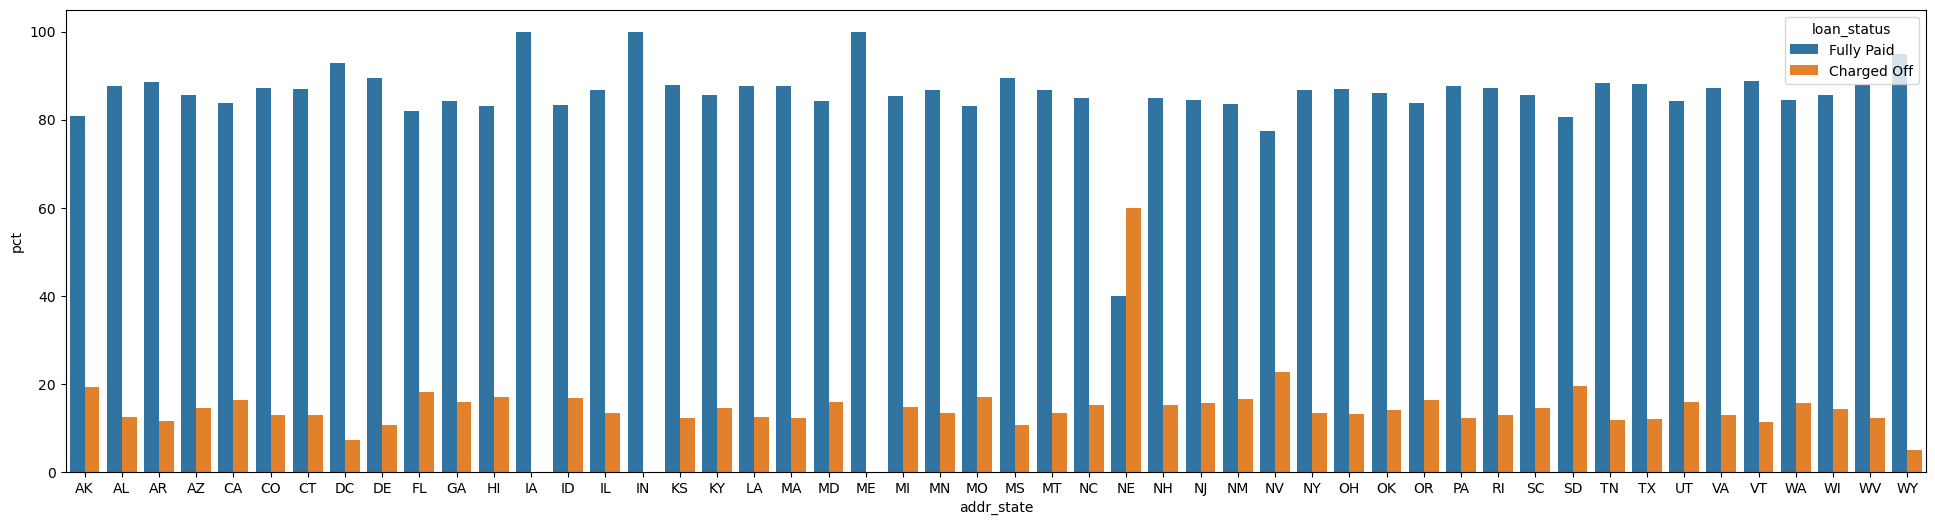

In [167]:
grouped_data = df_cleaned.groupby(['addr_state', 'loan_status']).size().reset_index(name='count')
grouped_data_t1 = df_cleaned.groupby(['addr_state']).size().reset_index(name='count')
merged_df = pd.merge(grouped_data, grouped_data_t1, on='addr_state')
merged_df['pct']=(merged_df['count_x']/merged_df['count_y'])*100
print(merged_df)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(24, 6))

# Assuming your DataFrame is named 'df'
sns.barplot(x='addr_state', y='pct', hue='loan_status', data=merged_df, hue_order = ['Fully Paid', 'Charged Off'])



   addr_state  loan_status  count_x  count_y        pct
0          AK  Charged Off       15       78  19.230769
1          AK   Fully Paid       63       78  80.769231
2          AL  Charged Off       54      435  12.413793
3          AL   Fully Paid      381      435  87.586207
4          AR  Charged Off       27      235  11.489362
..        ...          ...      ...      ...        ...
92         WI   Fully Paid      377      440  85.681818
93         WV  Charged Off       21      172  12.209302
94         WV   Fully Paid      151      172  87.790698
95         WY  Charged Off        4       80   5.000000
96         WY   Fully Paid       76       80  95.000000

[97 rows x 5 columns]


<Axes: xlabel='addr_state', ylabel='count_x'>

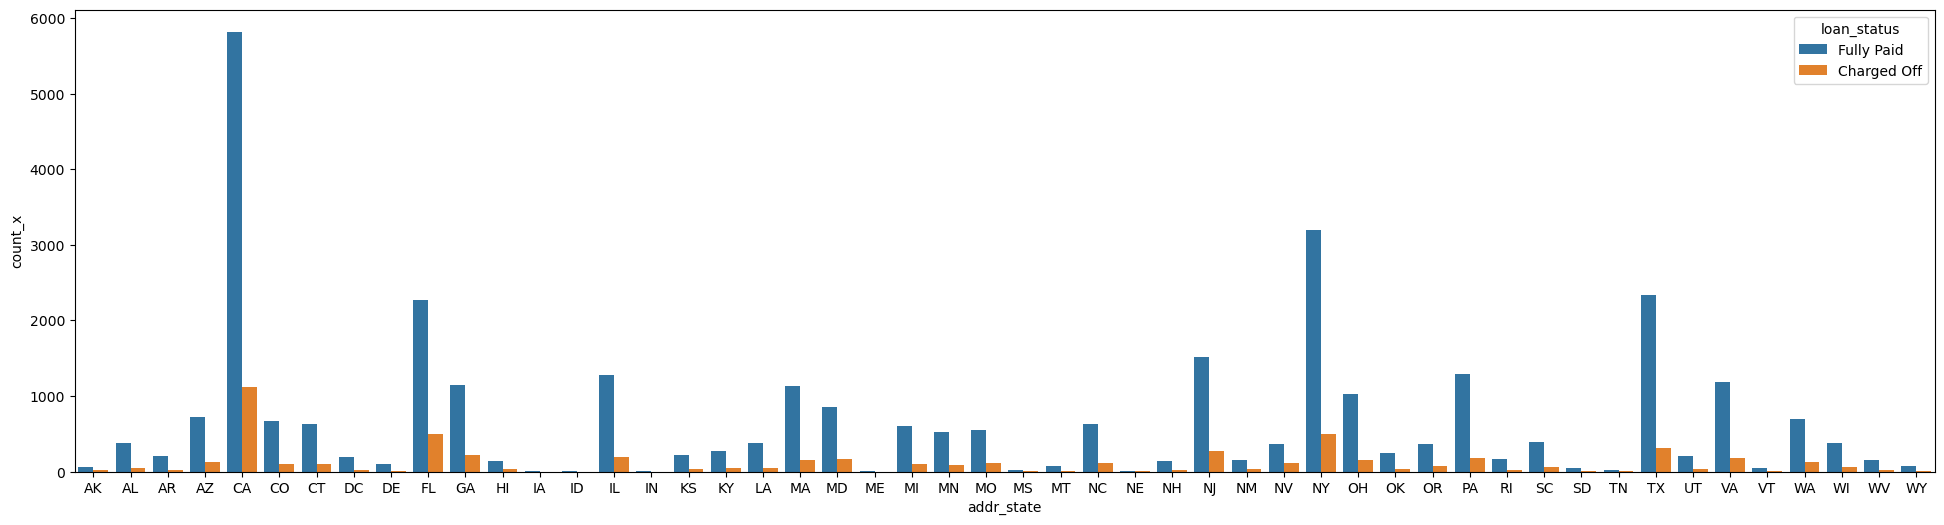

In [173]:
grouped_data = df_cleaned.groupby(['addr_state', 'loan_status']).size().reset_index(name='count')
grouped_data_t1 = df_cleaned.groupby(['addr_state']).size().reset_index(name='count')
merged_df = pd.merge(grouped_data, grouped_data_t1, on='addr_state')
merged_df['pct']=(merged_df['count_x']/merged_df['count_y'])*100
print(merged_df)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(24, 6))

# Assuming your DataFrame is named 'df'
sns.barplot(x='addr_state', y='count_x', hue='loan_status', data=merged_df, hue_order = ['Fully Paid', 'Charged Off'])

Customers from CA, NY, TX, and FL are the largest borrowers of loans, but these regions also have the highest volume of defaults.

## Correlation Matrix

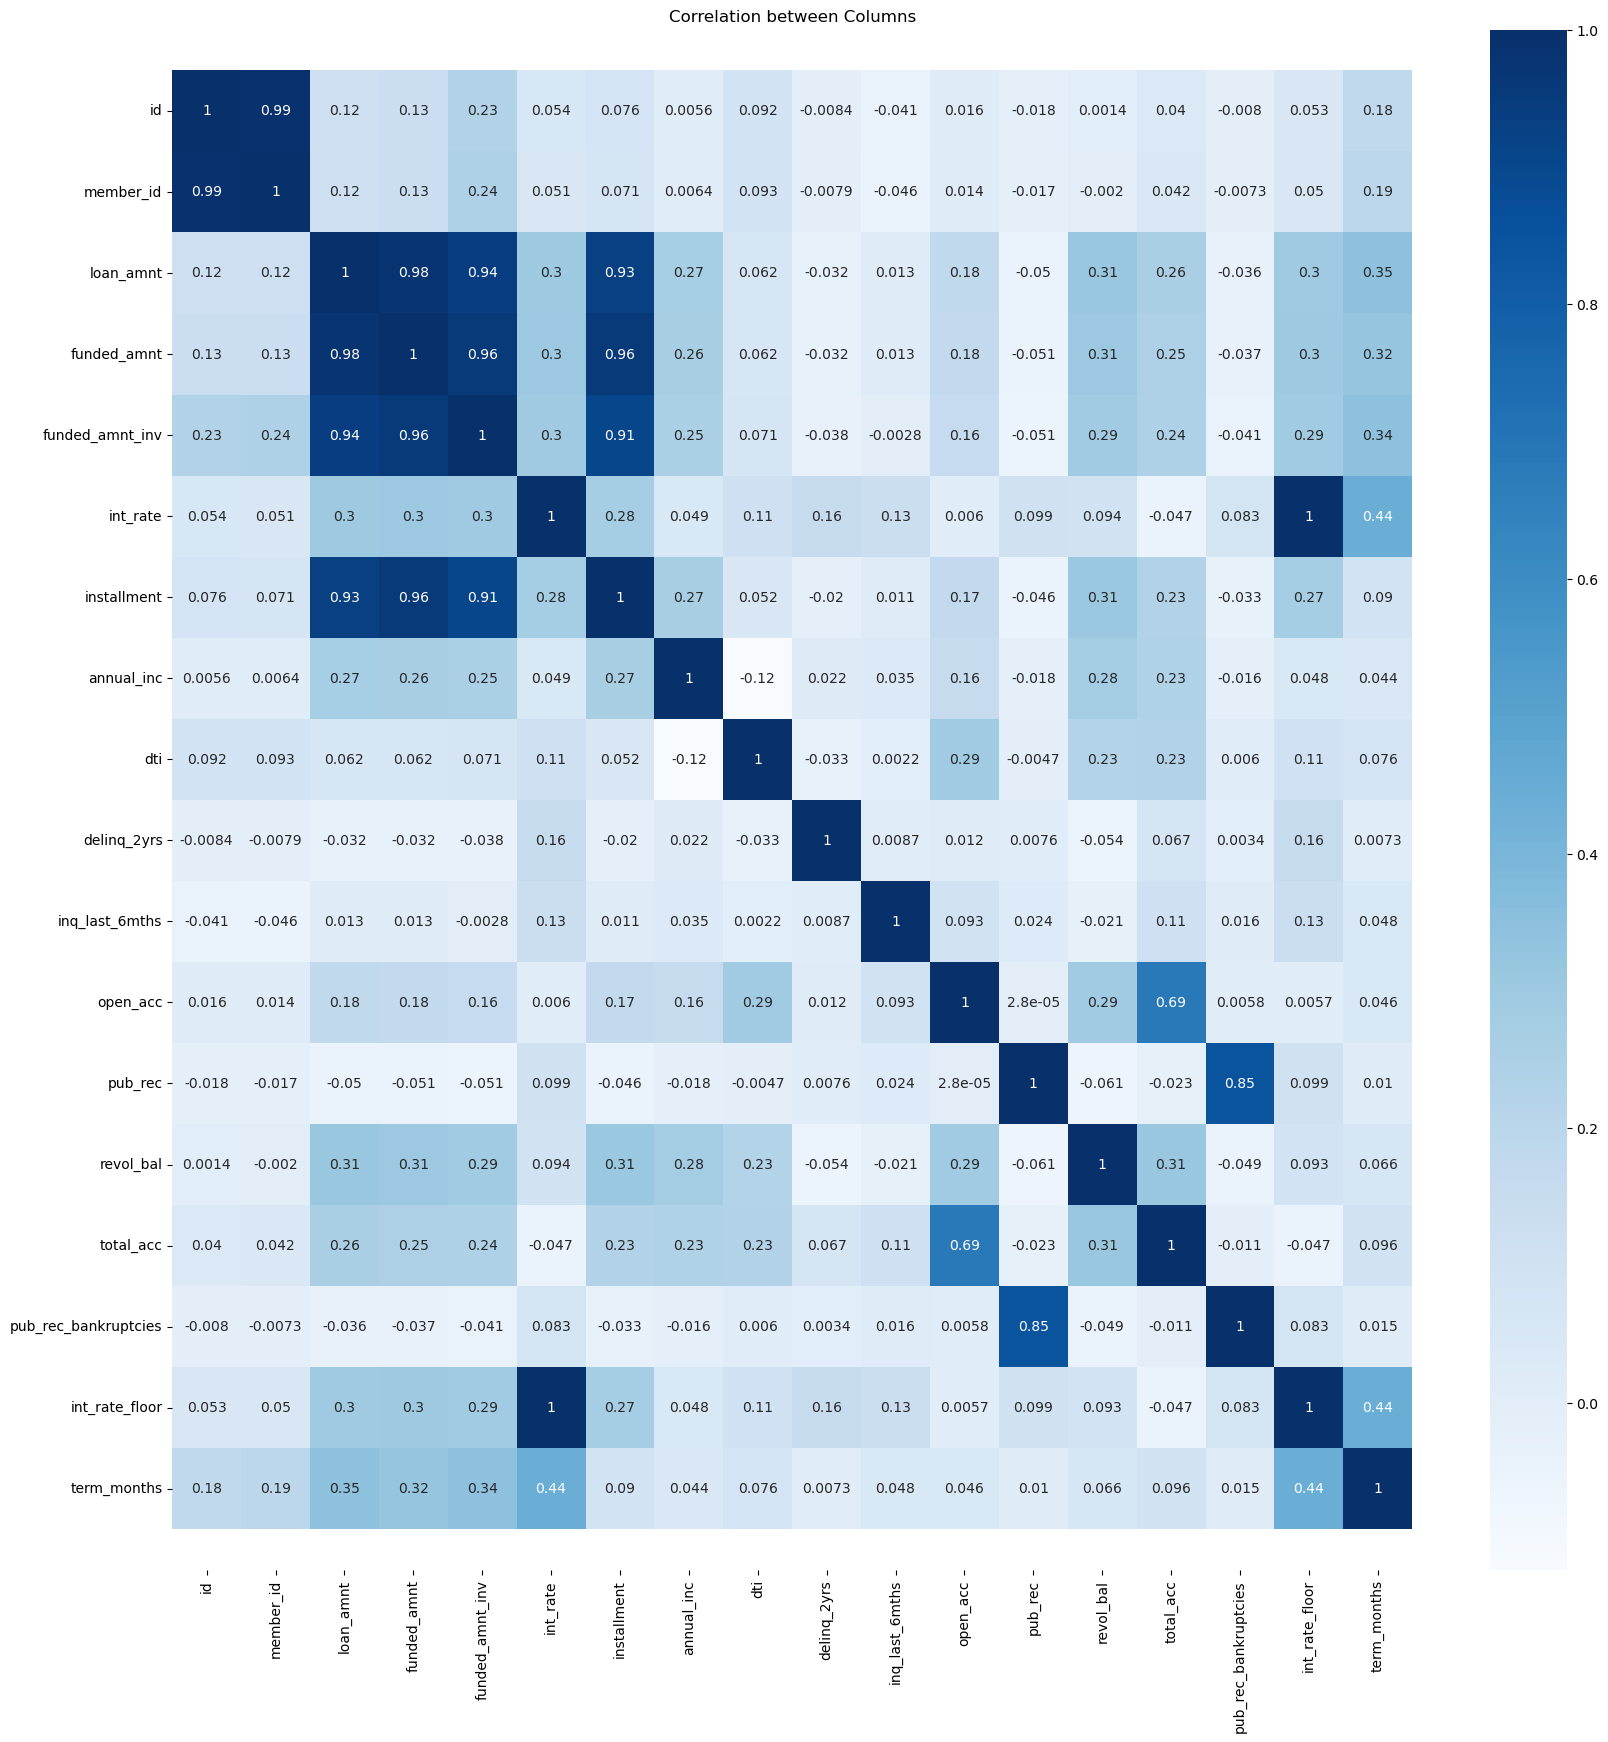

In [190]:
import numpy as np
# Assuming your DataFrame is named 'df'
df_numeric = df_cleaned.select_dtypes(include=np.number)
df_numeric=df_numeric.drop(['collections_12_mths_ex_med', 'tax_liens', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt'], axis=1)


# Create a new DataFrame with only the numeric columns
new_num_df = df_numeric.copy()


#Finding correlation matric
corr_matrix = new_num_df.corr()
plt.figure(figsize=(20,20))
#plotting correlatioon matric on a heat map
ax = sns.heatmap(corr_matrix, annot = True, cmap='Blues')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns")
plt.show()

There is a strong correlation between pub_rec and pub_rec_bankruptcies. There is a strong correlation between loan amount and number of installaments.